In [11]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
import os

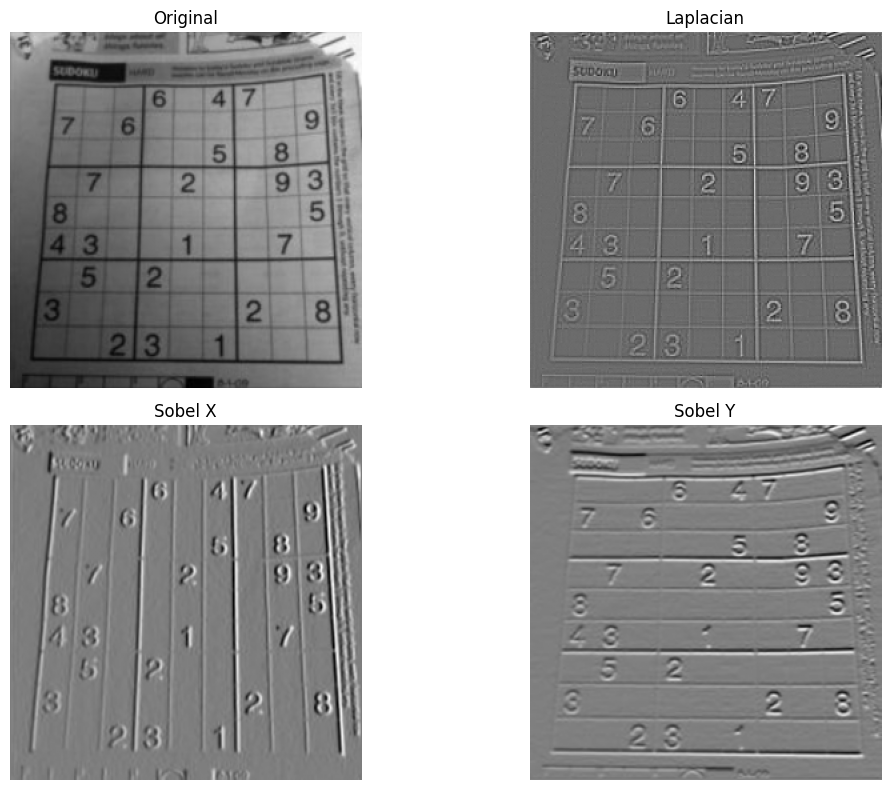

In [12]:
# 이미지 로드
img_path = 'dave.png'  # 분석할 이미지 경로
img = cv2.imread(img_path, cv2.IMREAD_GRAYSCALE)  # 이미지를 그레이스케일로 로드
if img is None:
    raise FileNotFoundError("Image not found. Upload or modify the path.")

# Laplacian 적용
laplacian = cv2.Laplacian(img, cv2.CV_64F)  # Laplacian 필터 적용

# Sobel X 적용
sobelx = cv2.Sobel(img, cv2.CV_64F, 1, 0, ksize=3)  # Sobel X 필터 적용

# Sobel Y 적용
sobely = cv2.Sobel(img, cv2.CV_64F, 0, 1, ksize=3)  # Sobel Y 필터 적용

# 시각화
plt.figure(figsize=(12, 8))

# 원본 이미지
plt.subplot(2, 2, 1)
plt.imshow(img, cmap='gray')
plt.title('Original')
plt.axis('off')

# Laplacian 결과
plt.subplot(2, 2, 2)
plt.imshow(laplacian, cmap='gray')
plt.title('Laplacian')
plt.axis('off')

# Sobel X 결과
plt.subplot(2, 2, 3)
plt.imshow(sobelx, cmap='gray')
plt.title('Sobel X')
plt.axis('off')

# Sobel Y 결과
plt.subplot(2, 2, 4)
plt.imshow(sobely, cmap='gray')
plt.title('Sobel Y')
plt.axis('off')

plt.tight_layout()
plt.show()

(Text(0.5, 1.0, 'Sobel Y'), ([], []), ([], []))

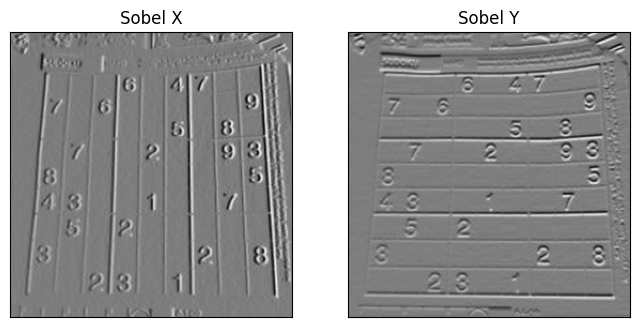

In [13]:
scharr_x = cv2.Sobel(img, cv2.CV_64F, 1, 0, ksize=1)
scharr_y = cv2.Sobel(img, cv2.CV_64F, 0, 1, ksize=1)

plt.figure(figsize=(8, 4))
plt.subplot(1, 2, 1),plt.imshow(scharr_x, cmap='gray')
plt.title('Sobel X'),plt.xticks([]),plt.yticks([])
plt.subplot(1, 2, 2),plt.imshow(scharr_y, cmap='gray')
plt.title('Sobel Y'),plt.xticks([]),plt.yticks([])

--2025-01-22 05:15:26--  https://raw.githubusercontent.com/opencv/opencv/master/samples/data/box.png
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.109.133, 185.199.110.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.108.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 50728 (50K) [image/png]
Saving to: ‘img_box_path’

img_box_path        100%[===================>]  49.54K  --.-KB/s    in 0.01s   

2025-01-22 05:15:26 (5.03 MB/s) - ‘img_box_path’ saved [50728/50728]



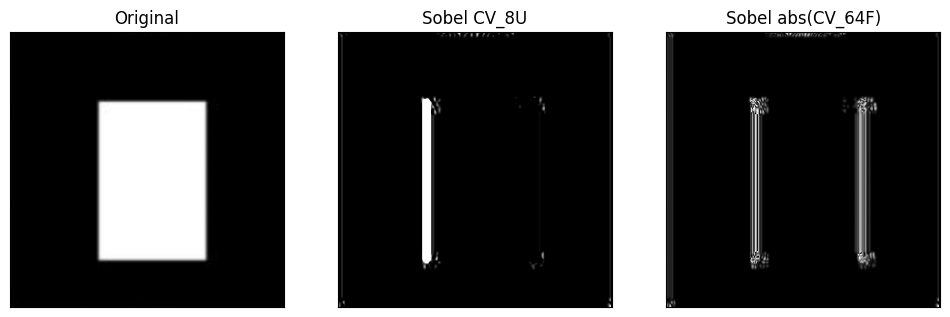

In [14]:
img_box_path = 'box.png'
!wget -O img_box_path https://raw.githubusercontent.com/opencv/opencv/master/samples/data/box.png
if not os.path.exists(img_box_path):
    print('box.png not found. Please check.')
else:
    img_box = cv2.imread('box.png', cv2.IMREAD_GRAYSCALE)

    if img_box is None:
        print("box.png read error.")
    else:
        sobelx_8u = cv2.Sobel(img_box, cv2.CV_8U, 1, 0, ksize=5)
        sobelx_64f = cv2.Sobel(img_box, cv2.CV_64F, 1, 0, ksize=5)
        abs_sobel64f = np.absolute(sobelx_64f)
        sobel_8u = np.uint8(abs_sobel64f)

        plt.figure(figsize=(12,4))

        plt.subplot(1,3,1)
        plt.imshow(img_box, cmap='gray')
        plt.title('Original')
        plt.xticks([])
        plt.yticks([])

        plt.subplot(1,3,2)
        plt.imshow(sobelx_8u, cmap='gray')
        plt.title('Sobel CV_8U')
        plt.xticks([])
        plt.yticks([])

        plt.subplot(1,3,3)
        plt.imshow(sobel_8u, cmap='gray')
        plt.title('Sobel abs(CV_64F)')
        plt.xticks([])
        plt.yticks([])

        plt.show()